Operaciones Morfológicas en Procesamiento de Imágenes

## Introducción Teórica

Las **operaciones morfológicas** son un conjunto de técnicas de procesamiento de imágenes que modifican la forma y estructura geométrica de los objetos en una imagen. Se basan en el uso de un **elemento estructurante** (también llamado kernel o máscara), que es una pequeña matriz (generalmente binaria) que se desliza sobre la imagen.

El elemento estructurante define una vecindad de píxeles y la operación morfológica determina el valor del píxel central en la imagen de salida basándose en los píxeles de esa vecindad en la imagen de entrada.

Estas operaciones son muy útiles para:

*   Eliminar ruido.
*   Segmentar objetos.
*   Encontrar contornos.
*   Extraer esqueletos de objetos.
*   Medir y cuantificar formas.

Trabajaremos principalmente con imágenes binarias (blanco y negro) y luego veremos ejemplos en escala de grises.

In [ ]:
# Instalación e Importación de Librerías
# !pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Para mostrar imágenes con OpenCV en Colab

print("Librerías importadas.")

Librerías importadas.


## Parte 1: Operaciones Morfológicas en Imágenes Binarias

Usaremos una imagen simple de una letra "J" para ilustrar estas operaciones.

--2025-05-07 00:25:43--  https://www.dropbox.com/s/fok3q35hm1o2k13/jota.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8ew343lf7pplgaovg6xyf/jota.png?rlkey=xkg2u68be0tahqwq69hfu2mbf [following]
--2025-05-07 00:25:43--  https://www.dropbox.com/scl/fi/8ew343lf7pplgaovg6xyf/jota.png?rlkey=xkg2u68be0tahqwq69hfu2mbf
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bf67c2d0c26f3a5138a3f4be9.dl.dropboxusercontent.com/cd/0/inline/CpNRWRGXCp-gRwoJ5W6yDUjgEWbKxA3qFE_wUNe4TvrYQQfDWUv8F8JTDhaG4hGXidTFT-IZEsPzJt9ngyNdpOZ-tgG4F2xN2TBoMiPv2jOmdAwRATQCGT3sf3STNYEc4Zg/file# [following]
--2025-05-07 00:25:44--  https://uc7bf67c2d0c26f3a5138a3f4be9.dl.dropboxusercontent.com/cd/0/inline/CpNRWRGXCp-gRwoJ5W6yDUjgEWbKxA3qFE

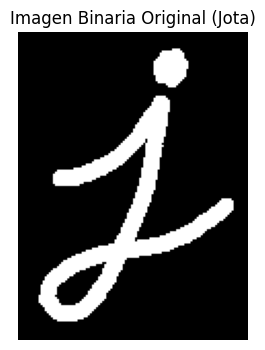

In [ ]:
# Cargar imagen binaria de ejemplo
!wget -O jota.png https://www.dropbox.com/s/fok3q35hm1o2k13/jota.png

img_jota_original = cv2.imread('jota.png', cv2.IMREAD_GRAYSCALE) # Cargar en escala de grises

# Binarizar la imagen para asegurarnos de que sea blanco y negro
# Los píxeles > 127 se vuelven 255 (blanco), el resto 0 (negro)
_ , img_jota_binaria = cv2.threshold(img_jota_original, 127, 255, cv2.THRESH_BINARY)


if img_jota_binaria is None:
    print("Error al cargar jota.png")
else:
    print("Imagen 'jota.png' cargada y binarizada.")
    plt.figure(figsize=(4,4))
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Imagen Binaria Original (Jota)')
    plt.axis('off')
    plt.show()

### Elemento Estructurante (Kernel)
Para las siguientes operaciones, usaremos un elemento estructurante. OpenCV nos permite crearlos fácilmente.
Un kernel común es un rectángulo de unos.

In [ ]:
# Definir un elemento estructurante (kernel)

# Kernel rectangular de 5x5 (lleno de unos)
# Podes probar otros tamaños, ej: (3,3), (7,7)
kernel_cuadrado_5x5 = np.ones((5,5), np.uint8)

# OpenCV también ofrece funciones para crear kernels de otras formas:
# kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
# kernel_cruz = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

print("Kernel cuadrado 5x5:")
print(kernel_cuadrado_5x5)

Kernel cuadrado 5x5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


### 1.1 Erosión
La erosión "adelgaza" o "encoge" las regiones blancas (objetos) en una imagen binaria. Un píxel en la imagen de salida es blanco solo si *todos* los píxeles bajo el kernel (cuando está centrado en ese píxel) son blancos en la imagen de entrada.
Es útil para eliminar pequeños puntos de ruido ("sal") o para separar objetos que están ligeramente conectados.

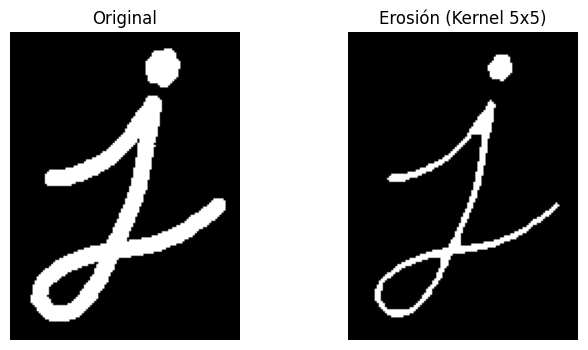

In [ ]:
# Erosión
if 'img_jota_binaria' in globals():
    img_erosion = cv2.erode(img_jota_binaria, kernel_cuadrado_5x5, iterations = 1)
    # 'iterations' define cuántas veces se aplica la operación.

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_erosion, cmap='gray')
    plt.title('Erosión (Kernel 5x5)')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.2 Dilatación
La dilatación "engorda" o "expande" las regiones blancas. Un píxel en la imagen de salida es blanco si *al menos uno* de los píxeles bajo el kernel es blanco en la imagen de entrada.
Es útil para rellenar pequeños huecos en objetos o para conectar componentes cercanos.

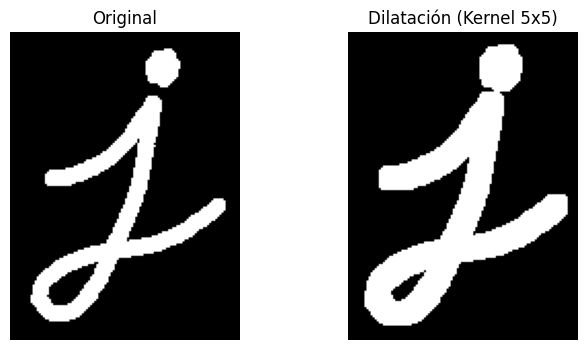

In [ ]:
# Dilatación
if 'img_jota_binaria' in globals():
    img_dilatacion = cv2.dilate(img_jota_binaria, kernel_cuadrado_5x5, iterations = 1)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_dilatacion, cmap='gray')
    plt.title('Dilatación (Kernel 5x5)')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.3 Apertura (Opening)
La apertura es una erosión seguida de una dilatación, usando el mismo elemento estructurante para ambas.
Es útil para:
*   Eliminar pequeños objetos aislados (ruido tipo "sal").
*   Suavizar los contornos de los objetos.
*   Abrir pequeños puentes entre objetos.
No afecta significativamente el tamaño general de los objetos más grandes.

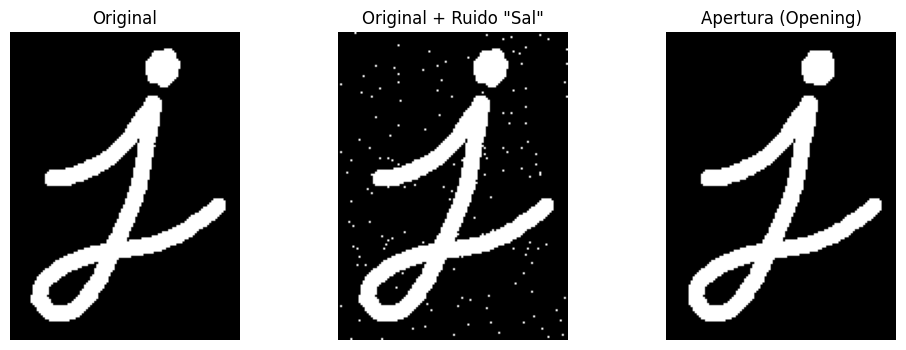

In [ ]:
# Apertura
if 'img_jota_binaria' in globals():
    # Primero, añadamos algo de ruido "sal" (píxeles blancos aleatorios)
    img_jota_con_ruido_sal = img_jota_binaria.copy()
    alto, ancho = img_jota_con_ruido_sal.shape
    num_pixeles_ruido = int(0.01 * alto * ancho) # 1% de ruido
    for _ in range(num_pixeles_ruido):
        fila_ruido = np.random.randint(0, alto)
        col_ruido = np.random.randint(0, ancho)
        img_jota_con_ruido_sal[fila_ruido, col_ruido] = 255 # Ruido blanco

    img_apertura = cv2.morphologyEx(img_jota_con_ruido_sal, cv2.MORPH_OPEN, kernel_cuadrado_5x5)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img_jota_con_ruido_sal, cmap='gray')
    plt.title('Original + Ruido "Sal"')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_apertura, cmap='gray')
    plt.title('Apertura (Opening)')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.4 Cierre (Closing)
El cierre es una dilatación seguida de una erosión, usando el mismo elemento estructurante.
Es útil para:
*   Rellenar pequeños agujeros dentro de los objetos (ruido tipo "pimienta").
*   Conectar componentes cercanos.
*   Suavizar contornos.
No afecta significativamente el tamaño general de los objetos más grandes.

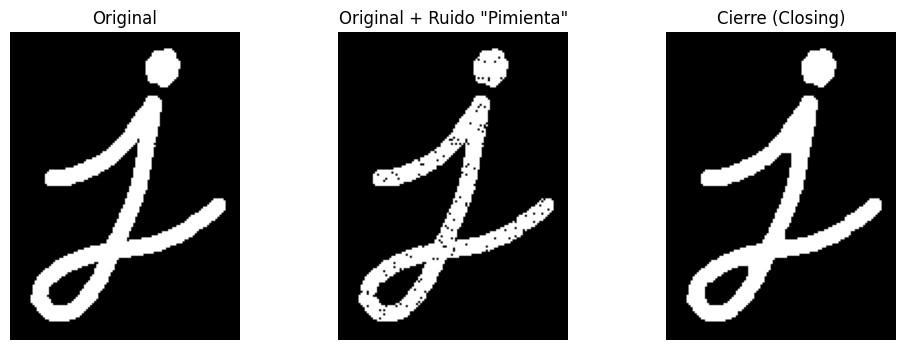

In [ ]:
# Cierre
if 'img_jota_binaria' in globals():
    # Añadamos algo de ruido "pimienta" (píxeles negros aleatorios en el objeto)
    img_jota_con_ruido_pimienta = img_jota_binaria.copy()
    alto, ancho = img_jota_con_ruido_pimienta.shape

    # Generar ruido solo dentro de la J (donde los píxeles son blancos)
    coordenadas_blancas = np.argwhere(img_jota_con_ruido_pimienta == 255)
    num_pixeles_objeto = len(coordenadas_blancas)
    num_pixeles_ruido = int(0.05 * num_pixeles_objeto) # 5% de ruido en el objeto

    if num_pixeles_objeto > 0 and num_pixeles_ruido > 0:
      indices_ruido = np.random.choice(num_pixeles_objeto, num_pixeles_ruido, replace=False)
      for idx in indices_ruido:
          fila_ruido, col_ruido = coordenadas_blancas[idx]
          img_jota_con_ruido_pimienta[fila_ruido, col_ruido] = 0 # Ruido negro

    img_cierre = cv2.morphologyEx(img_jota_con_ruido_pimienta, cv2.MORPH_CLOSE, kernel_cuadrado_5x5)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img_jota_con_ruido_pimienta, cmap='gray')
    plt.title('Original + Ruido "Pimienta"')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_cierre, cmap='gray')
    plt.title('Cierre (Closing)')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.5 Esqueletización
La esqueletización reduce los objetos de primer plano en una imagen binaria a una representación de "esqueleto" que conserva la topología y conectividad del objeto original, pero con un grosor de un píxel.
Se logra aplicando repetidamente operaciones de erosión y apertura morfológica hasta que no se puedan erosionar más píxeles sin romper la conectividad.

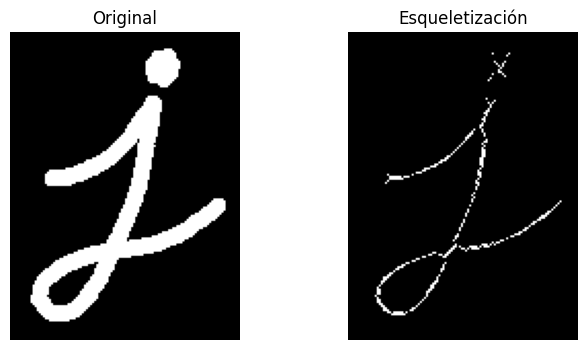

In [ ]:
# Esqueletización
# (Basado en https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331)

if 'img_jota_binaria' in globals():
    img_para_esqueleto = img_jota_binaria.copy()

    # Crear un esqueleto vacío de las mismas dimensiones que la imagen
    esqueleto = np.zeros(img_para_esqueleto.shape, np.uint8)

    # Obtener un elemento estructurante en forma de cruz (común para esqueletización)
    kernel_cruz_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    # Repetir hasta que la imagen esté completamente erosionada
    iteracion = 0
    max_iteraciones = 100 # Límite para evitar bucles infinitos

    img_temp_esqueleto = img_para_esqueleto.copy()

    while iteracion < max_iteraciones:
        # Paso 1: Apertura de la imagen (erosión seguida de dilatación)
        apertura_temp = cv2.morphologyEx(img_temp_esqueleto, cv2.MORPH_OPEN, kernel_cruz_3x3)

        # Paso 2: Restar la apertura de la imagen original (para obtener los píxeles que se eliminarían)
        temp_resta = cv2.subtract(img_temp_esqueleto, apertura_temp)

        # Paso 3: Erosionar la imagen original y refinar el esqueleto
        erodida_temp = cv2.erode(img_temp_esqueleto, kernel_cruz_3x3)

        # Acumular los píxeles del esqueleto (OR bit a bit)
        esqueleto = cv2.bitwise_or(esqueleto, temp_resta)

        # Actualizar la imagen para la siguiente iteración
        img_temp_esqueleto = erodida_temp.copy()

        # Paso 4: Si no quedan píxeles blancos, la imagen ha sido completamente erosionada, salir del bucle
        if cv2.countNonZero(img_temp_esqueleto) == 0:
            break
        iteracion += 1

    if iteracion == max_iteraciones:
        print("Advertencia: Se alcanzó el máximo de iteraciones para la esqueletización.")

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(esqueleto, cmap='gray')
    plt.title('Esqueletización')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.5.1 Esqueletización (Alternativa Simplificada con OpenCV ximgproc)

OpenCV, a través de su módulo de procesamiento extendido `ximgproc`, ofrece una función directa para la esqueletización llamada `thinning`. Esta función es generalmente más optimizada.

**Nota:** El módulo `ximgproc` podría no estar disponible en todas las instalaciones básicas de OpenCV. Si usas `opencv-python`, podrías necesitar instalar `opencv-contrib-python` para acceder a él. Colab generalmente lo incluye.

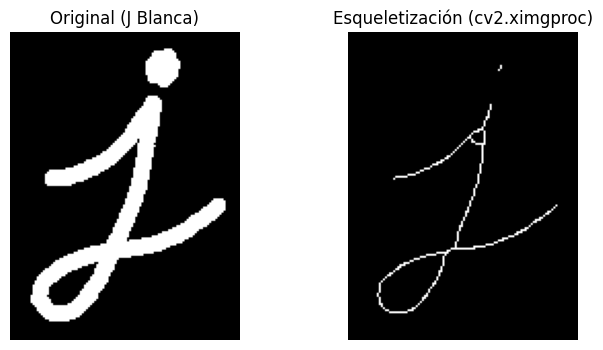

In [ ]:
# Esqueletización con cv2.ximgproc.thinning

if 'img_jota_binaria' in globals() and img_jota_binaria is not None:
    try:
        # Aplicar esqueletización usando el algoritmo de Zhang-Suen (uno de los tipos disponibles)
        esqueleto_ximgproc = cv2.ximgproc.thinning(img_jota_binaria, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(img_jota_binaria, cmap='gray', vmin=0, vmax=255)
        plt.title('Original (J Blanca)')
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(esqueleto_ximgproc, cmap='gray', vmin=0, vmax=255)
        plt.title('Esqueletización (cv2.ximgproc)')
        plt.axis('off')
        plt.show()

    except AttributeError:
        print("cv2.ximgproc.thinning no está disponible.")
        print("Esto puede ser porque necesitas el paquete 'opencv-contrib-python' en lugar de 'opencv-python'.")
        print("Mostrando el resultado del método iterativo si está disponible:")
        if 'esqueleto_iterativo' in globals() and esqueleto_iterativo is not None:
             plt.figure(figsize=(4,4))
             plt.imshow(esqueleto_iterativo, cmap='gray', vmin=0, vmax=255)
             plt.title('Esqueletización (Iterativa - celda anterior)')
             plt.axis('off')
             plt.show()
    except Exception as e:
        print(f"Ocurrió un error inesperado con ximgproc: {e}")
else:
    print("Por favor, ejecuta la celda 2 primero para cargar la imagen 'jota'.")

### 1.6 Gradiente Morfológico
El gradiente morfológico es la diferencia entre la dilatación y la erosión de una imagen.
Resalta los bordes o contornos de los objetos en la imagen.

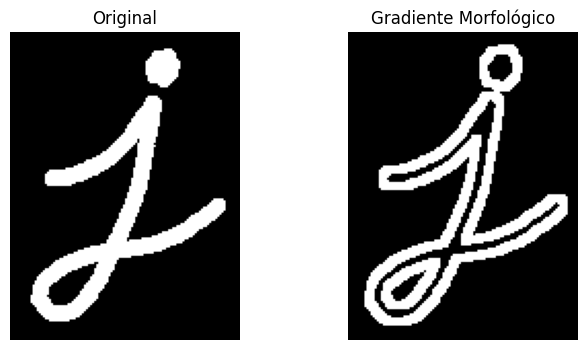

In [ ]:
# Gradiente Morfológico
if 'img_jota_binaria' in globals():
    img_gradiente = cv2.morphologyEx(img_jota_binaria, cv2.MORPH_GRADIENT, kernel_cuadrado_5x5)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_jota_binaria, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_gradiente, cmap='gray')
    plt.title('Gradiente Morfológico')
    plt.axis('off')
    plt.show()
else:
    print("Ejecuta la celda 2 primero para cargar la imagen.")

### 1.7 Relleno de Agujeros (Fill Holes)
Esta operación rellena los agujeros internos de los objetos. Un agujero es una región de fondo (negra) rodeada por píxeles de objeto (blancos).
Utiliza una técnica llamada `floodFill` (o relleno por inundación) de OpenCV.

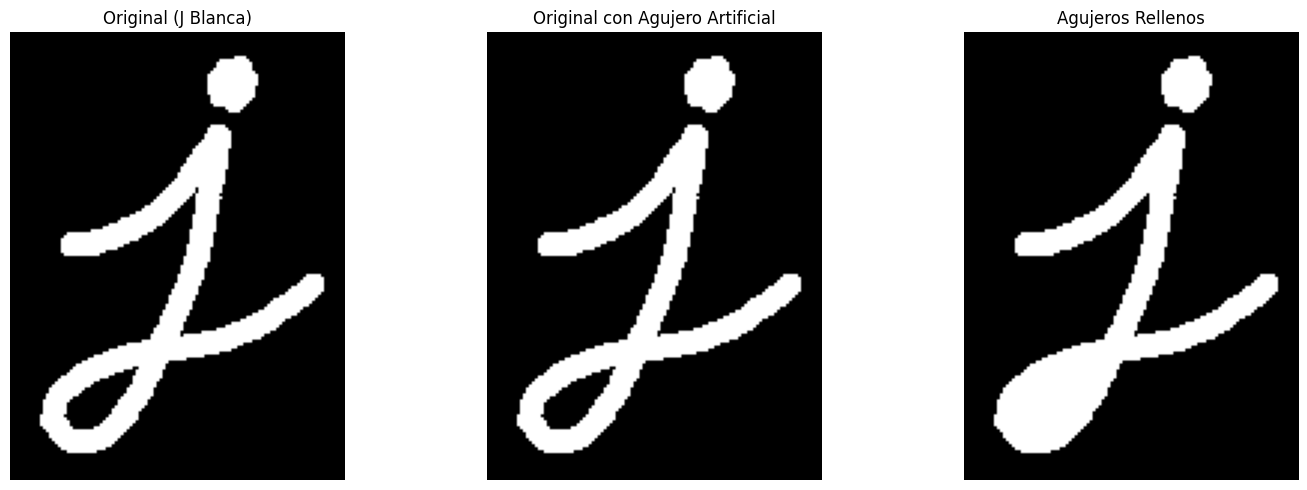

In [ ]:
# Relleno de Agujeros

if 'img_jota_binaria' in globals() and img_jota_binaria is not None:
    img_con_agujero = img_jota_binaria.copy()
    # Creamos un cuadrado negro (valor 0) DENTRO de una parte blanca de la J.
    # Coordenadas para un agujero en el trazo vertical de la J:
    # (columna_inicio, fila_inicio), (columna_fin, fila_fin)
    cv2.rectangle(img_con_agujero, (72, 50), (77, 55), 0, -1) # Pequeño agujero en el trazo vertical

    def rellenar_agujeros(imagen_binaria_objeto_blanco):
        img_para_relleno = imagen_binaria_objeto_blanco.copy()
        alto, ancho = img_para_relleno.shape[:2]
        mascara = np.zeros((alto + 2, ancho + 2), np.uint8)
        img_para_relleno = img_para_relleno.astype("uint8")

        # Rellenar desde el borde (0,0).
        cv2.floodFill(img_para_relleno, mascara, (0, 0), 255)

        # Invertir: El fondo exterior y las regiones conectadas a él se vuelven 0.
        # Los agujeros internos (no conectados al borde) se vuelven 255.
        img_relleno_inundacion_inv = cv2.bitwise_not(img_para_relleno)

        # El OR con la original rellena los agujeros (que ahora son 255 en la máscara invertida)
        img_salida = imagen_binaria_objeto_blanco | img_relleno_inundacion_inv
        return img_salida

    img_rellena = rellenar_agujeros(img_con_agujero)

    # Visualizar las imágenes
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img_jota_binaria, cmap='gray', vmin=0, vmax=255)
    plt.title('Original (J Blanca)')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img_con_agujero, cmap='gray', vmin=0, vmax=255)
    plt.title('Original con Agujero Artificial')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_rellena, cmap='gray', vmin=0, vmax=255)
    plt.title('Agujeros Rellenos')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Por favor, ejecuta la celda 2 primero para cargar y binarizar la imagen 'jota'.")

## Parte 2: Operaciones Morfológicas en Imágenes en Escala de Grises

Las operaciones morfológicas también se pueden aplicar a imágenes en escala de grises. En lugar de "encoger" o "expandir" regiones blancas, operan sobre los niveles de intensidad de los píxeles.

*   **Erosión en escala de grises:** El valor del píxel de salida es el *mínimo* de los valores de los píxeles en la vecindad definida por el kernel. Esto tiende a oscurecer la imagen y a agrandar las regiones oscuras.
*   **Dilatación en escala de grises:** El valor del píxel de salida es el *máximo* de los valores de los píxeles en la vecindad. Tiende a aclarar la imagen y a agrandar las regiones claras.
*   **Gradiente en escala de grises:** (Dilatación - Erosión). Resalta regiones con cambios rápidos de intensidad (bordes).

--2025-05-07 00:25:46--  https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/7t2g5u3anb0wc0osntgia/tazmania.png?rlkey=ghojt8e1spg9rymljyps7fyg7 [following]
--2025-05-07 00:25:46--  https://www.dropbox.com/scl/fi/7t2g5u3anb0wc0osntgia/tazmania.png?rlkey=ghojt8e1spg9rymljyps7fyg7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc153ff3310959361966d32c8f27.dl.dropboxusercontent.com/cd/0/inline/CpN0wgk9U4wpSp5OjKgDqVtMetie-9h1GfzInXZdbfkvTgn5ygJKt6WlgV097UMjDUiXcV0ODE9CPfaMBsGXAn8pl8yx-2rCh_ViuSBJza6Cua7apvoO4sJFXkYNYDhRqeU/file# [following]
--2025-05-07 00:25:46--  https://uc153ff3310959361966d32c8f27.dl.dropboxusercontent.com/cd/0/inline/CpN0wgk9U4wpSp5OjKgDqV

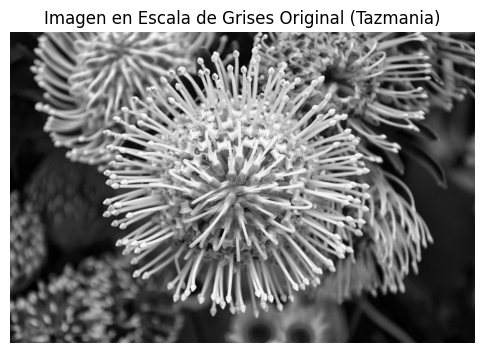

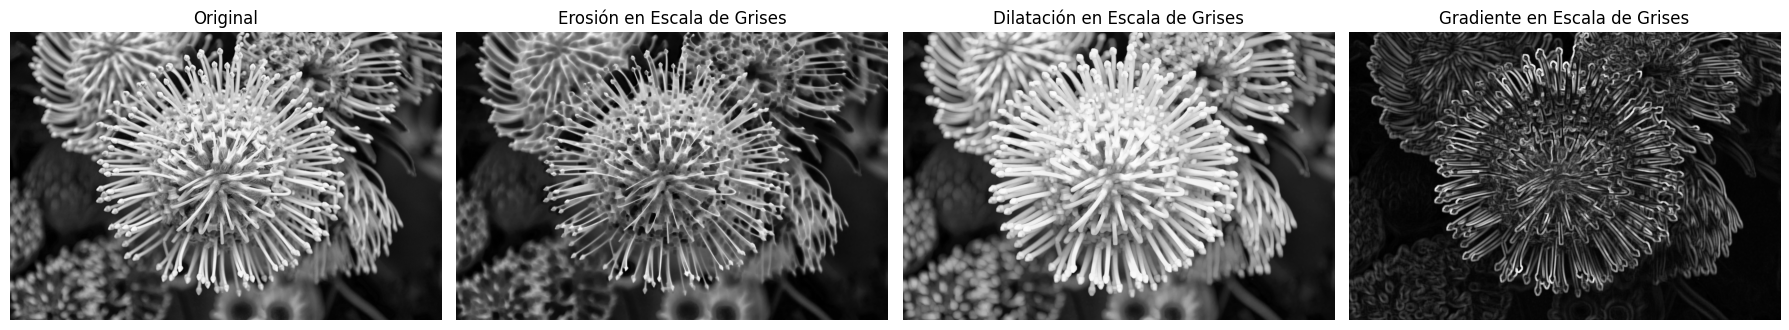

In [ ]:
# Cargar imagen en escala de grises de ejemplo
!wget -O tazmania.png https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png

img_taz_original = cv2.imread('tazmania.png', cv2.IMREAD_GRAYSCALE)

if img_taz_original is None:
    print("Error al cargar tazmania.png")
else:
    print("Imagen 'tazmania.png' cargada.")
    plt.figure(figsize=(6,6))
    plt.imshow(img_taz_original, cmap='gray')
    plt.title('Imagen en Escala de Grises Original (Tazmania)')
    plt.axis('off')
    plt.show()

    # Kernel para operaciones en escala de grises (puede ser el mismo)
    n_kernel_gris = 7
    kernel_gris_7x7 = np.ones((n_kernel_gris, n_kernel_gris), np.uint8)

    # Erosión en escala de grises
    img_taz_erosion = cv2.erode(img_taz_original, kernel_gris_7x7, iterations=1)

    # Dilatación en escala de grises
    img_taz_dilatacion = cv2.dilate(img_taz_original, kernel_gris_7x7, iterations=1)

    # Gradiente morfológico en escala de grises
    img_taz_gradiente = cv2.morphologyEx(img_taz_original, cv2.MORPH_GRADIENT, kernel_gris_7x7)

    # Mostrar resultados
    plt.figure(figsize=(18, 6))

    plt.subplot(1,4,1)
    plt.imshow(img_taz_original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(img_taz_erosion, cmap='gray')
    plt.title('Erosión en Escala de Grises')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(img_taz_dilatacion, cmap='gray')
    plt.title('Dilatación en Escala de Grises')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(img_taz_gradiente, cmap='gray') # Mostrar gradiente también en gris
    plt.title('Gradiente en Escala de Grises')
    plt.axis('off')

    plt.tight_layout()
    plt.show()